### Group member: Yusen Wu, Jingmin Chen, Jiaqi Min

# Part 1: Introduction

Airbnb,Inc. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

The data types are integer, string, float, date.

Research Question:

Which neighbour(s) is distinguishably more popular compared with others?


# Part2: Data Summmary

We acquired the dataset from https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/downloads/new-york-city-airbnb-open-data.zip/3


The dataset contains 48895 rows and 16 attritubes:
1. 'id':                  (Integer),         listing ID
2. 'name':                  (String)  ,         name of the listing
3. 'host_id':               (Integer)  ,         host ID
4. 'host_name':              (String)   ,        name of the host
5. 'neighbourhood_group':    (String)    ,       location
6. 'neighbourhood':         (String)     ,      area
7. 'latitude':          (Float)       ,    latitude coordinates
8. 'longitude':              (Float)        ,   longitude coordinates
9. 'room_type':               (String)       ,   listing space type
10. 'price':                   (Integer)      ,    price in dollars
11. 'minimum_nights':          (Integer)       ,   amount of nights minimum
12. 'number_of_reviews':      (Integer)         ,  number of reviews
13. 'last_review':            (Date)          ,latest review
14. 'reviews_per_month':      (Float)        ,   number of reviews per month
15. 'calculated_host_listings_count': (Integer) ,  amount of listing per host
16. 'availability_365':       (Integer)          , number of days when listing is available for booking

For answer the question above, we will use these attributes:

neighbourhood_group, room_type, price, availability_365

# Part 3: Exploratory Data Analysis (EDA)

In [74]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


import numpy, pandas, matplotlib and seaborn, use pd.read to read file and df.head() to show the first 5 row.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

use df.info() to check each detail information for each attributes

In [76]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


use df.describe()to perform some basic summary for each attributes, including count, mean, std etc.
*id and host_id are string attributs, so mean and std etc have no actually meaning. 

In [77]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

check the null value

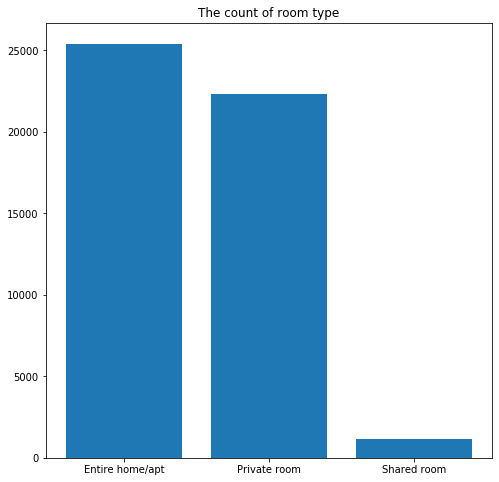

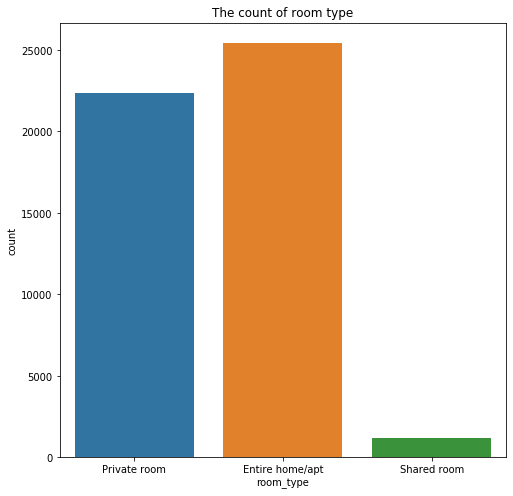

In [78]:
# matplotlib
plt.figure(figsize=(8,8))
counts = df.room_type.value_counts()
plt.bar(counts.index, counts.values)
plt.title('The count of room type')
plt.show()

# seaborn
sns.countplot(df.room_type)
plt.gcf().set_size_inches(8, 8)
plt.title('The count of room type')
plt.show()

attribute: Room type 

use plt.gcf() create a figure with size 8x8, 
use sns.countplot() function to count room type airbnbs, 
insert title using plt.title()

*most of the room type are private room or entire space, shared room are far less compare with these 2. 

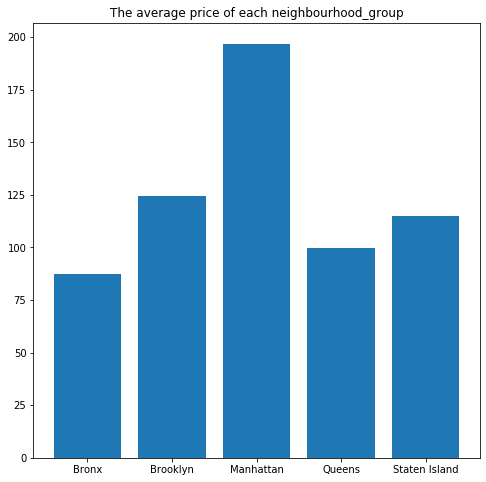

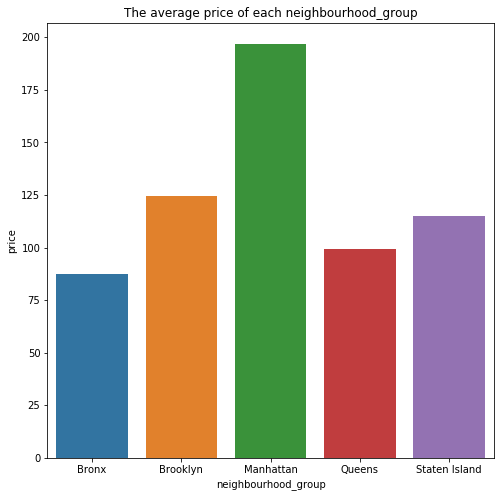

In [79]:
# matplotlib
plt.figure(figsize=(8,8))
df1 = df[["neighbourhood_group","price"]]
a = df1.groupby("neighbourhood_group").mean()
plt.bar(a.index,a.price.tolist())
plt.title('The average price of each neighbourhood_group')
plt.show()

#seaborn
df1 = df[["neighbourhood_group","price"]]
a = df1.groupby("neighbourhood_group").mean()
sns.barplot(x = a.index,y = 'price',data = a )
plt.gcf().set_size_inches(8, 8)
plt.title('The average price of each neighbourhood_group')
plt.show()

attributes: neighbourhood_group, price
plt.figure to generate a figure with size 8x8
df[] gets data that we need and assign it to df1
group df1 and calculate the mean assign to a
use plt.bar to generate bar plot
use plt.title to insert title
plt.show()

*from the plot we can tell, average price of each neighborhood from high to low are Manhattan, Brooklyn, Staten Island, Queens, Bronx. 

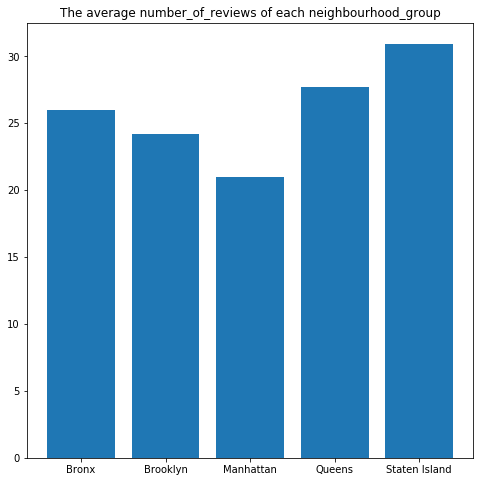

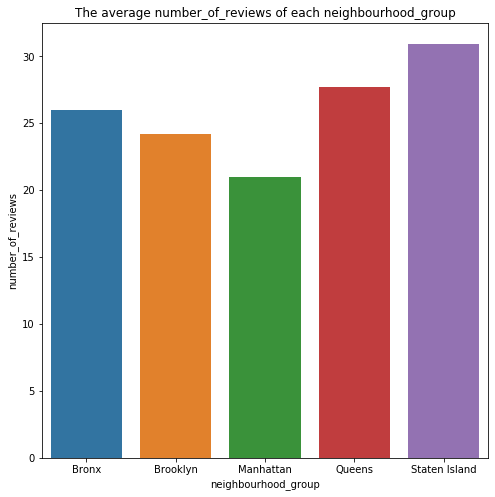

In [80]:
# matplotlib
plt.figure(figsize=(8,8))
df1 = df[["neighbourhood_group","number_of_reviews"]]
a = df1.groupby("neighbourhood_group").mean()
plt.bar(a.index,a.number_of_reviews.tolist())
plt.title('The average number_of_reviews of each neighbourhood_group')
plt.show()

#seaborn
df1 = df[["neighbourhood_group","number_of_reviews"]]
a = df1.groupby("neighbourhood_group").mean()
sns.barplot(x = a.index,y = 'number_of_reviews',data = a )
plt.gcf().set_size_inches(8, 8)
plt.title('The average number_of_reviews of each neighbourhood_group')
plt.show()

attribute: number_of_reviews

Use plt.figure()/plt.gcf() to create a figure with size 8x8 and create a new dataframe df1 with columns "neighbourhood_group","number_of_reviews"
,use groupby() and mean()function to find the average of number_of_reviews of each neighbourhood_groups, use plt.bar()/sns.barplot() to plot a barplot and use plt.title to change a title

*compare those chart with the price mean chart, results are intresting, neighborhood with a higher average price have lower average number of reviews such as Manhattan and Brooklyn. Other neighborhood Queens, Bronx,Staten Island have higher average reviews and lower average price. 

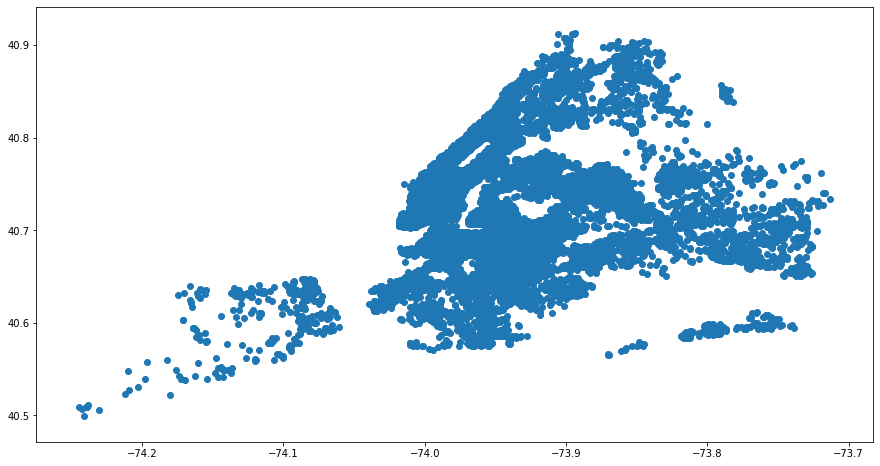

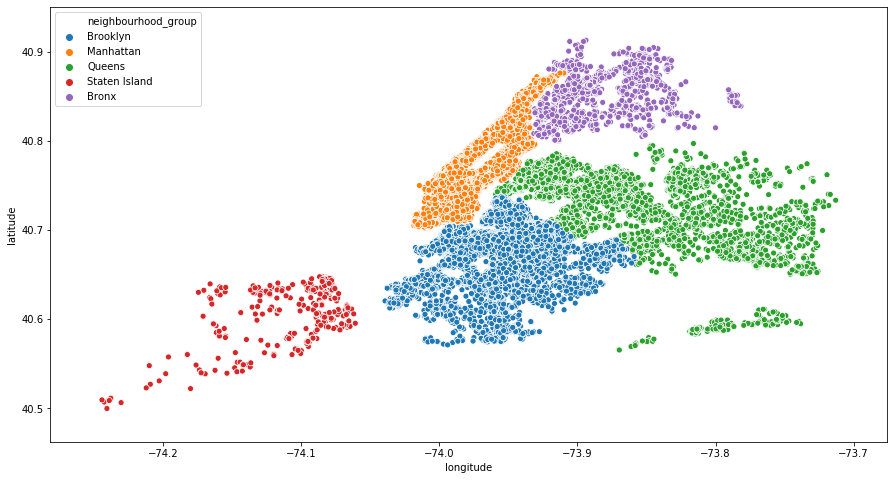

In [81]:
#matplotlib
plt.figure(figsize=(15,8))
plt.scatter(df.longitude,df.latitude)
plt.show()

#seaborn
sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group)
plt.gcf().set_size_inches(15, 8)
plt.show()

attributes: latitude, longitude

use plt.figure()/plt.gcf() to create a figure with size 15x8 and use plt.scatter/sns.scatterplot to plot a scatterplot of lonfitude and lattitude to represent the neighbourhood groups

*Airbnb in Manhattan and Brooklyn are more concentrated(number of airbnb/area size), and Queens occupied the largest area. 

***some attributes was not summarized or graphedk such as ID and host_id, because they are nominal attributes, they are used for identifying our user and host, does't not have any actually meaning, neither does last review time, we consider summarize that attributes can not provide any useful information to our report, so those attributs are not included. 

# Part 4: Inference

### 4.1 The count of Airbnb's in the different neighbourhood groups

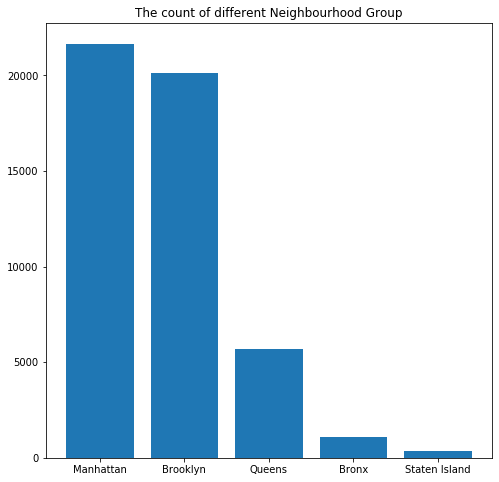

In [172]:
# matplotlib
plt.figure(figsize=(8,8))
counts = df["neighbourhood_group"].value_counts()
plt.bar(counts.index, counts.values)
plt.title('The count of different Neighbourhood Group')
plt.show()

use plt.figure to create a figure with size 8X8
counts to counts the sum of airbnbs in each neighbourhood
use plt.bar to get bar table, the 'neighbourhood group' as x axis and 'counts values' as y axis. also insert plt. title to change title and plt.show() to show the bar chart.


Text(0.5, 1.0, 'The count of different Neighbourhood Group')

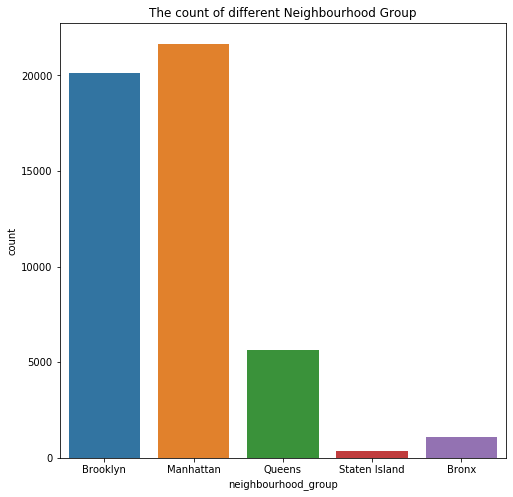

In [171]:
# seaborn
sns.countplot(df['neighbourhood_group'])
plt.gcf().set_size_inches(8, 8)
plt.title('The count of different Neighbourhood Group')

sns.countplot() function to count neighbourhood group airbnbs
plt.gcf() create a figure with size 8x8
insert title using plt.title()

*finding: From the bar chart we can see, most airbnbs concentrated in Manhhattan & Brooklyn, the differences between other neighbourhood and 'Manhattan & Brooklyn' are huge, 'Manhattan & Brooklyn' each have at lease 3 times more airbnb than other neighborhood. 

### 4.2 Room availability in neighbourhood_groups

{'whiskers': [<matplotlib.lines.Line2D at 0x1a327f57b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a327f5da0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1a327f5b70>,
 'medians': [<matplotlib.lines.Line2D at 0x1a3282b6d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a3282bc88>,
 'means': []}

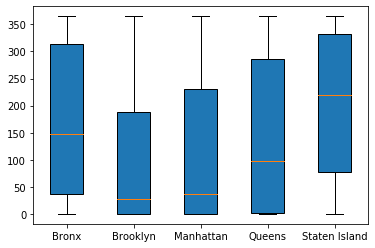

In [167]:
# matplotlib
a = df[df.neighbourhood_group == "Bronx"][["availability_365"]]
b = df[df.neighbourhood_group == "Brooklyn"][["availability_365"]]
c = df[df.neighbourhood_group == "Manhattan"][["availability_365"]]
d = df[df.neighbourhood_group == "Queens"][["availability_365"]]
e = df[df.neighbourhood_group == "Staten Island"][["availability_365"]]
data = [a.values,b.values,c.values,d.values,e.values]
plt.boxplot(data,patch_artist=True,labels=['Bronx','Brooklyn','Manhattan','Queens','Staten Island'])

refering each neighbourhood group and its availability as abcde, and assign to a list called 'data'
using plt.boxplot to get a box plot, patch_artist=True to color the boxes, and assign lables to the x axis. 

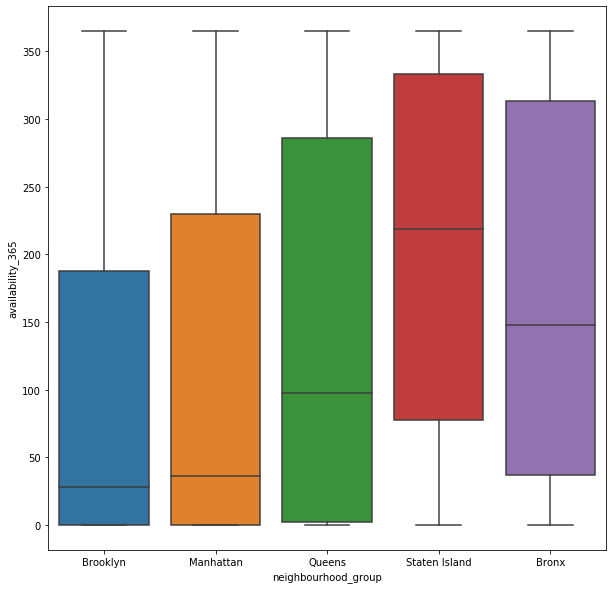

In [146]:
# seaborn
plt.figure(figsize=(10,10))
df1 = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')
df1

plt.figure() to create a figure of size 10x10
sns.boxplot() to get a box plot and 'neighbourhood_group' as x axis, 'availability' as y axis

*Finding: From the box plot, we can see Brooklyn has the lowest availability neighbourbood followed by Manhattan, both mean and range. 

# Part 5: Conclusion

In order to answer the research question, we tried to compare the total counts of Airbnb and the availabilkity of each neighbourhood. A higher counts and lower availability indicates the neighbourhood have a lower availabity percent which is more likely to be booked. 
From our analysis about counts and availability, we can draw a conclusion that Manhattan and Brooklyn are definate more popular than the other 3 neighbourhood, basic on the total availability/counts rate. 